In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
import seaborn as sns

import frame_whitening as fw
import frame_whitening.plot as fwplt
import frame_whitening.simulation_new as sim

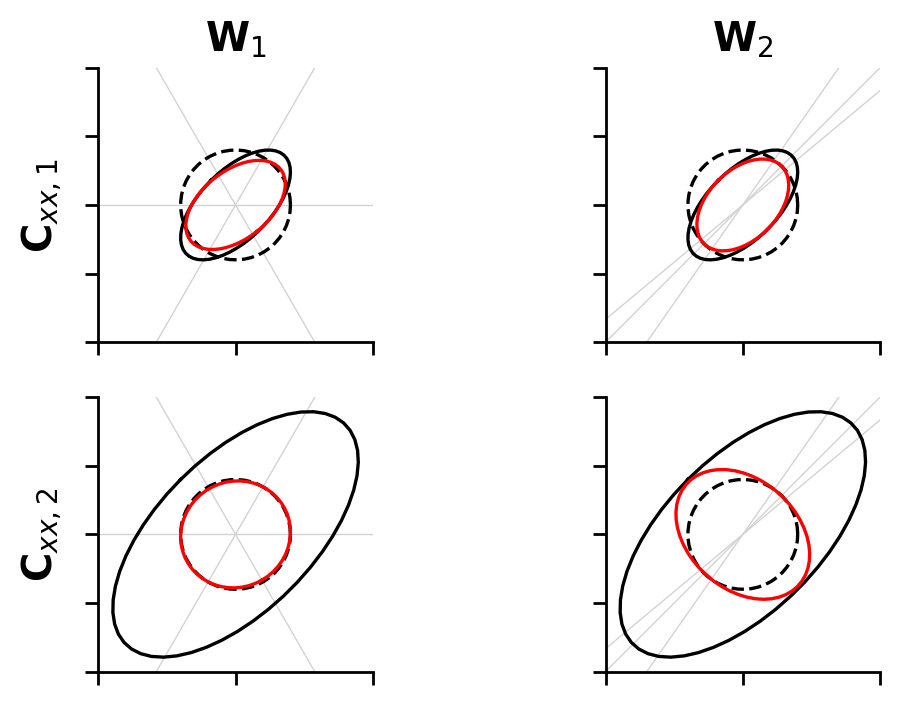

In [84]:
I = np.eye(2)

W = fw.get_mercedes_frame()
W = fw.normalize_frame(W)

Cxx0 = np.array([[1, 0.6], [0.6, 1]])
Cxx1 = Cxx0 * 5

W0 = fw.get_mercedes_frame()
W0 = fw.normalize_frame(W0)

W1 = np.array([[1, .7, 1.2], [1, 1, 1]])
W1 = fw.normalize_frame(W1)

def get_m(W, g):
    return np.linalg.inv(I + W @ np.diag(g) @ W.T)

def whiten(Cxx, W):
    Lxx = np.linalg.cholesky(Cxx)
    g, _, _, _ = sim.simulate([Lxx], W, 0, 10000, 5E-3, None, online=False, clamp=True)
    g = g.squeeze()
    M = get_m(W, g)
    return M @ Cxx @ M.T

def plot_frame_axes2d(W, ax, colors=None, lim=5):
    if colors is None:
        colors = ["k"] * W.shape[1]
    else:
        assert len(colors) == W.shape[1]

    x = np.linspace(-lim, lim, 10)
    for i in range(W.shape[1]):
        ax.plot(x, (W[1, i] / W[0, i]) * x,  "-", lw=.5, color="lightgrey", zorder=-1)
   
with sns.plotting_context("paper", font_scale=1.5):
    fig, ax = plt.subplots(2, 2, sharey="all", sharex="all", dpi=200)
    fwplt.plot_ellipse(I, n_pts=50, ax=ax[0,0], color="k", linestyle="--")
    fwplt.plot_ellipse(Cxx0, n_pts=50, ax=ax[0,0], color="k")
    fwplt.plot_ellipse(whiten(Cxx0, W0), n_pts=50, ax=ax[0,0], color="r")
    plot_frame_axes2d(W0, ax[0,0])

    fwplt.plot_ellipse(I, n_pts=50, ax=ax[0,1], color="k", linestyle="--")
    fwplt.plot_ellipse(Cxx0, n_pts=50, ax=ax[0,1], color="k")
    fwplt.plot_ellipse(whiten(Cxx0, W1), n_pts=50, ax=ax[0,1], color="r")
    plot_frame_axes2d(W1, ax[0,1])

    fwplt.plot_ellipse(I, n_pts=50, ax=ax[1,0], color="k", linestyle="--")
    fwplt.plot_ellipse(Cxx1, n_pts=50, ax=ax[1,0], color="k")
    fwplt.plot_ellipse(whiten(Cxx1, W0), n_pts=50, ax=ax[1,0], color="r")
    plot_frame_axes2d(W0, ax[1,0])

    fwplt.plot_ellipse(I, n_pts=50, ax=ax[1,1], color="k", linestyle="--")
    fwplt.plot_ellipse(Cxx1, n_pts=50, ax=ax[1,1], color="k")
    fwplt.plot_ellipse(whiten(Cxx1, W1), n_pts=50, ax=ax[1,1], color="r")
    plot_frame_axes2d(W1, ax[1,1])

    ax[0,0].axis("square")

    ax[0,1].axis("square")
    ax[1,0].axis("square")
    ax[1,1].axis("square")

    ax[0,0].set(xlim=(-5, 5), ylim=(-5, 5), xticklabels=[], yticklabels=[],
    title=r"${\bf W}_1$", ylabel=r"${\bf C}_{xx,1}$")
    ax[0,1].set(title=r"${\bf W}_2$")
    ax[1,0].set(ylabel=r"${\bf C}_{xx,2}$")

    sns.despine()